##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
# mnist = tf.keras.datasets.mnist
# # min/max normalization
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)), # just flattens data, needs to divide cleanly, therefore it must be resized beforehand or else it will throw u an error
#   tf.keras.layers.Dense(128, activation='relu'), #
#   tf.keras.layers.Dropout(0.2), #
#   tf.keras.layers.Dense(10)
# ])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
# predictions = model(x_train[:1]).numpy()
# predictions

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [ ]:
# tf.nn.softmax(predictions).numpy()

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
# loss_fn(y_train[:1], predictions).numpy()

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
# model.compile(optimizer='adam',
#               loss=loss_fn,
#               metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
# model.fit(x_train, y_train, epochs = 8)

The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
# model.evaluate(x_test,  y_test, verbose=2)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
# probability_model = tf.keras.Sequential([
#   model,
#   tf.keras.layers.Softmax()
# ])

In [ ]:
# probability_model(x_test[:5])

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import numpy as np
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
# filtering data to remove outliers


In [ ]:
dataset = tf.keras.datasets.california_housing
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# Flatten y_train and y_test for percentile calculation
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Calculate the 5th and 95th percentiles of the target variable in the training data
percentage5 = np.percentile(y_train_flat, 5)
percentage95 = np.percentile(y_train_flat, 95) # Using 95th percentile as per plan

# Create boolean masks for filtering based on the target variable in the training data
train_mask = (y_train_flat >= percentage5) & (y_train_flat <= percentage95)

# Apply the masks to filter both x_train and y_train
x_train_filtered = x_train[train_mask]
y_train_filtered = y_train[train_mask]

# Create boolean masks for filtering based on the same thresholds in the testing data
test_mask = (y_test_flat >= percentage5) & (y_test_flat <= percentage95)

# Apply the masks to filter both x_test and y_test
x_test_filtered = x_test[test_mask]
y_test_filtered = y_test[test_mask]

# Now use the filtered data for normalization and training
# normalize the data -> you cannot use /255.0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform((x_train_filtered))
x_test_scaled = scaler.transform(x_test_filtered)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train_filtered.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test_filtered.reshape(-1,1))

# Optional: inverse transform y_train_scaled to get original values for percentile check
y_train_original_scaled = y_scaler.inverse_transform(y_train_scaled)
ninety_fifth_percentile_scaled = np.percentile(y_train_original_scaled, 97.5)

# the result of the normalization should be between 0 and 1


#show predictions of the first data point then the first 10 points
# predictions = model(x_train[:1]).numpy()
# predictions

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
# loss_fn = tf.keras.losses.MeanSquaredError()
# loss_fn = tf.keras.losses.MeanAbsoluteError()
loss_fn = tf.keras.losses.Huber()

In [ ]:
model.compile(optimizer='adam', loss = loss_fn, metrics = ['hinge' , 'r2_score'])
model.fit(x_train_scaled, y_train_scaled, epochs = 20)

Epoch 1/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - hinge: 0.8642 - loss: 0.0074 - r2_score: 0.7015
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - hinge: 0.8639 - loss: 0.0070 - r2_score: 0.7160
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - hinge: 0.8678 - loss: 0.0068 - r2_score: 0.7153
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - hinge: 0.8630 - loss: 0.0066 - r2_score: 0.7323
Epoch 5/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - hinge: 0.8644 - loss: 0.0069 - r2_score: 0.7204
Epoch 6/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - hinge: 0.8637 - loss: 0.0069 - r2_score: 0.7184
Epoch 7/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - hinge: 0.8633 - loss: 0.0071 - r2_score: 0.7151
Epoch 8/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - hinge: 0.8664 - loss: 0.0069 - r2_score: 0.7175
Epoch 9/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - hinge: 0.8663 - loss: 0.0070 - r2_score: 0.7171
Epoch 10/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - hinge: 0.8649 - loss: 0.006

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

116/116 - 0s - 2ms/step - hinge: 0.8650 - loss: 0.0066 - r2_score: 0.7231


[0.006596260704100132, 0.8650378584861755, 0.7230881452560425]

In [ ]:
# plotting predicted values

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[226895.34]
 [231680.58]
 [182640.97]
 ...
 [ 99535.95]
 [173542.47]
 [189188.23]] [[226895.34]
 [231680.58]
 [182640.97]
 ...
 [ 99535.95]
 [173542.47]
 [189188.23]]


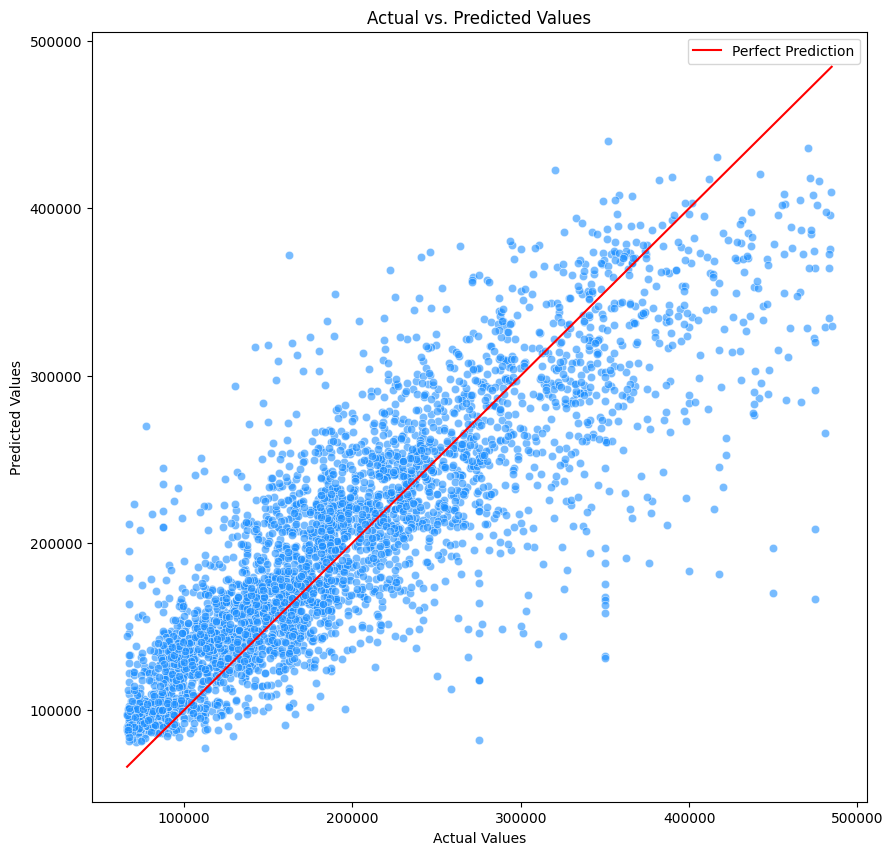

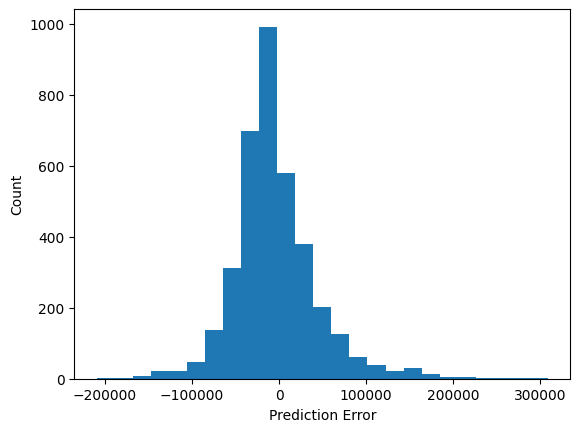

In [ ]:
y_preds = y_scaler.inverse_transform(model.predict(x_test))
print(y_preds, y_preds)
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

actual = y_scaler.inverse_transform(y_test).flatten()
predicted = y_preds.flatten()

results_df = pd.DataFrame({'Actual': actual, 'Predicted': predicted})

plt.figure(figsize=(10, 10))

sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='dodgerblue', alpha=0.6)

sns.lineplot(x=actual, y=actual, color='red', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
error = y_scaler.inverse_transform(y_test) - y_preds
plt.show()
def errorPlot(error):
    plt.hist(error, bins = 25)
    plt.xlabel("Prediction Error")
    plt.ylabel("Count")
    plt.show()
errorPlot(error)

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


# Task
Remove the bottom 5% and top 5-10% outliers from the training and testing data based on the target variable, then apply log normalization to the cleaned data, train the existing neural network model, and evaluate its performance.

## Determine the outlier thresholds

### Subtask:
Calculate the values that correspond to the 5th and 95th (or 90th) percentiles of the target variable in the training data.


**Reasoning**:
Calculate the 5th and 95th percentiles of the training target variable.

